In [1]:
# Section 0
# prepare environment and data.

# Part 0
# Load library

library(tidyverse)
library(repr)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
# Section 0
# Part 1
# prepare environment.

default_plot_width <- 7
default_plot_height <- 7
# default_plot_width <- 10
# default_plot_height <- 10
set.seed(1)

options(repr.matrix.max.rows = 6)
options(repr.plot.width = default_plot_width, repr.plot.height = default_plot_height)

In [3]:
# Section 0
# Part 1 - continue
# prepare environment - constant
SAMPLE_SIZE = 731 # MAX 731
confidence_level = 0.95

In [4]:
# Section 0
# Part 2
# prepare data.

# download zip file
zipFileUrl <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
temp <- tempfile()
download.file(zipFileUrl, temp)
rawData <- read.csv(unz(temp, "hour.csv"))
unlink(temp)
# above code consult: https://stackoverflow.com/questions/3053833/using-r-to-download-zipped-data-file-extract-and-import-data
head(rawData)

BikeSharingData <- rawData %>%
    group_by(dteday) %>%
    summarize(cnt = sum(cnt), workingday=mean(workingday)) %>%
    ungroup() %>%
    select(workingday, cnt) %>%
    mutate(isworkingday = (workingday == 1)) %>%
    mutate(isworkingday = as.factor(isworkingday)) %>%
    rep_sample_n(size = SAMPLE_SIZE) %>%
    ungroup() %>%
    select(isworkingday, cnt)

nrow(BikeSharingData)
head(BikeSharingData)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
6,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1


[1] 731

isworkingday,cnt
<fct>,<int>
TRUE,5992
TRUE,4362
TRUE,5260
FALSE,7132
TRUE,3894
TRUE,4120


In [5]:
# Section 1
# Quick summary of all data

# Part 0
# split data to (all), (holiday), (not holiday)

all_BikeSharingData <- BikeSharingData %>% select(cnt)
workingday_BikeSharingData <- filter(BikeSharingData, isworkingday=="TRUE") %>% select(cnt)
notworkingday_BikeSharingData <- filter(BikeSharingData, isworkingday=="FALSE") %>% select(cnt)



In [6]:
# Section 1
# Part 1
# numerical
# Important !!!: the order is not in good logic, only take needed part to the Proposal
#                contact me if need more.

summary(all_BikeSharingData)
nrow(all_BikeSharingData)
mean(all_BikeSharingData$cnt)
median(all_BikeSharingData$cnt)

sd(all_BikeSharingData$cnt)
IQR(all_BikeSharingData$cnt)

summary(workingday_BikeSharingData)
nrow(workingday_BikeSharingData)
mean(workingday_BikeSharingData$cnt)
median(workingday_BikeSharingData$cnt)

sd(workingday_BikeSharingData$cnt)
IQR(workingday_BikeSharingData$cnt)

summary(notworkingday_BikeSharingData)
nrow(notworkingday_BikeSharingData)
mean(notworkingday_BikeSharingData$cnt)
median(notworkingday_BikeSharingData$cnt)

sd(notworkingday_BikeSharingData$cnt)
IQR(notworkingday_BikeSharingData$cnt)

      cnt      
 Min.   :  22  
 1st Qu.:3152  
 Median :4548  
 Mean   :4504  
 3rd Qu.:5956  
 Max.   :8714  

[1] 731

[1] 4504.349

[1] 4548

[1] 1937.211

[1] 2804

      cnt      
 Min.   :  22  
 1st Qu.:3344  
 Median :4582  
 Mean   :4585  
 3rd Qu.:5988  
 Max.   :8362  

[1] 500

[1] 4584.82

[1] 4582

[1] 1878.416

[1] 2643.25

      cnt      
 Min.   : 605  
 1st Qu.:2710  
 Median :4459  
 Mean   :4330  
 3rd Qu.:5908  
 Max.   :8714  

[1] 231

[1] 4330.169

[1] 4459

[1] 2052.141

[1] 3197

In [7]:
# Section 1
# Part 1 - continue
# numerical in a table
rbind(BikeSharingData, BikeSharingData %>% mutate(isworkingday="Overall")) %>%
    group_by(isworkingday) %>%
    summarize(min = min(cnt), max = max(cnt), 
              mean= mean(cnt), median=median(cnt), 
              sd= sd(cnt), IQR=IQR(cnt))

isworkingday,min,max,mean,median,sd,IQR
<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,605,8714,4330.169,4459,2052.141,3197.00
TRUE,22,8362,4584.820,4582,1878.416,2643.25
Overall,22,8714,4504.349,4548,1937.211,2804.00


Warning message:
“Removed 4 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


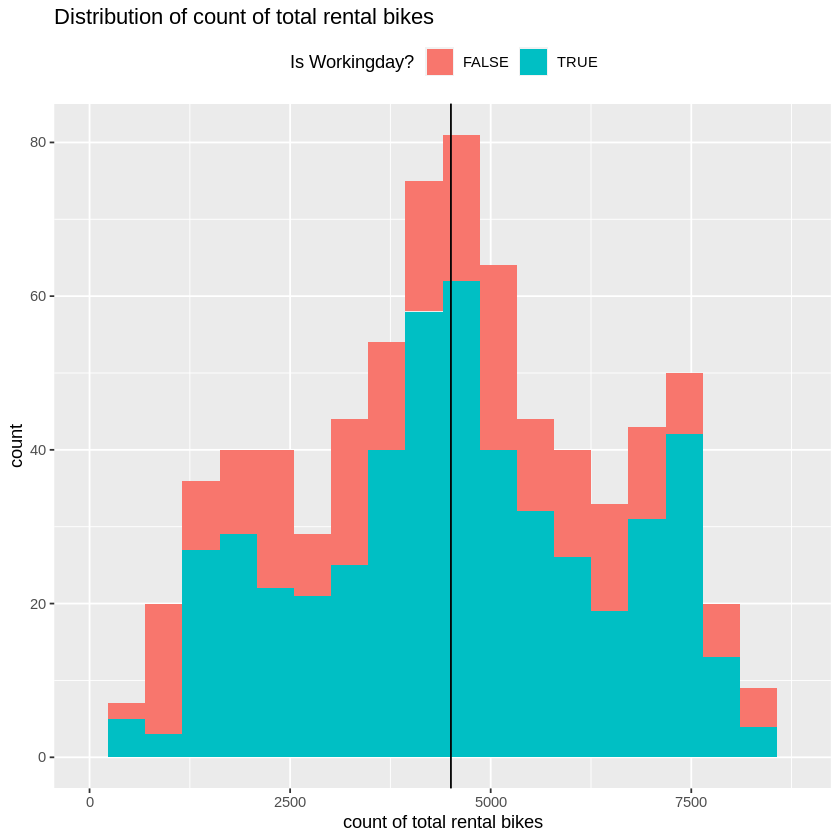

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


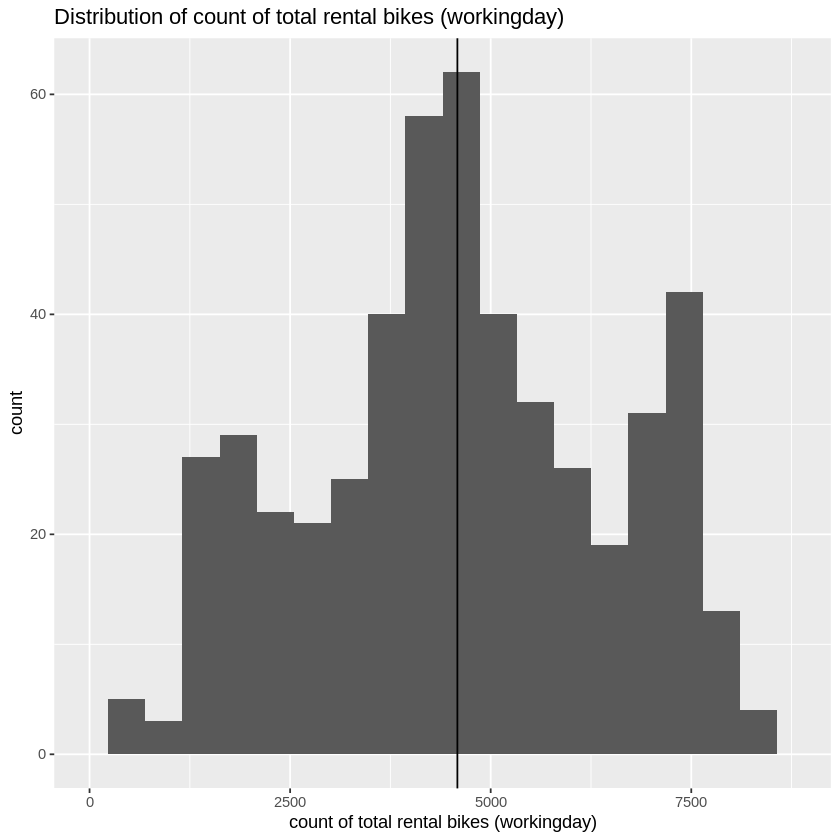

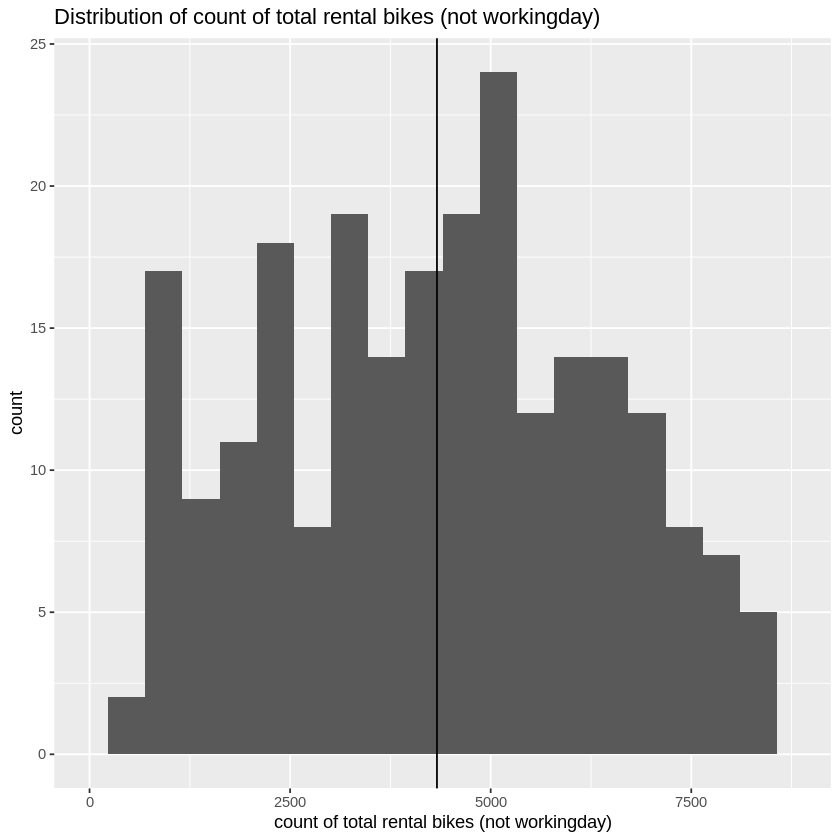

In [8]:
# Section 1
# Part 2
# visualization


all_BikeSharingData_hist <- ggplot(BikeSharingData, 
                                   aes(x = cnt, fill = isworkingday)) +
  geom_histogram(bins=20) +
  labs(x="count of total rental bikes", fill="Is Workingday?") +
  ggtitle("Distribution of count of total rental bikes") +
  geom_vline(xintercept = mean(BikeSharingData$cnt)) +
  theme(legend.position="top") +
  xlim(0, 8800)
  
all_BikeSharingData_hist

holiday_BikeSharingData_hist <- ggplot(workingday_BikeSharingData, aes(x = cnt)) +
  geom_histogram(bins=20) +
  labs(x="count of total rental bikes (workingday)") +
  ggtitle("Distribution of count of total rental bikes (workingday)") +
  geom_vline(xintercept = mean(workingday_BikeSharingData$cnt)) +
   xlim(0, 8800)

  
holiday_BikeSharingData_hist

notHoliday_BikeSharingData_hist <- ggplot(notworkingday_BikeSharingData, aes(x = cnt)) +
  geom_histogram(bins=20) +
  labs(x="count of total rental bikes (not workingday)") +
  ggtitle("Distribution of count of total rental bikes (not workingday)")+
  geom_vline(xintercept = mean(notworkingday_BikeSharingData$cnt)) +
  xlim(0, 8800)

  
notHoliday_BikeSharingData_hist




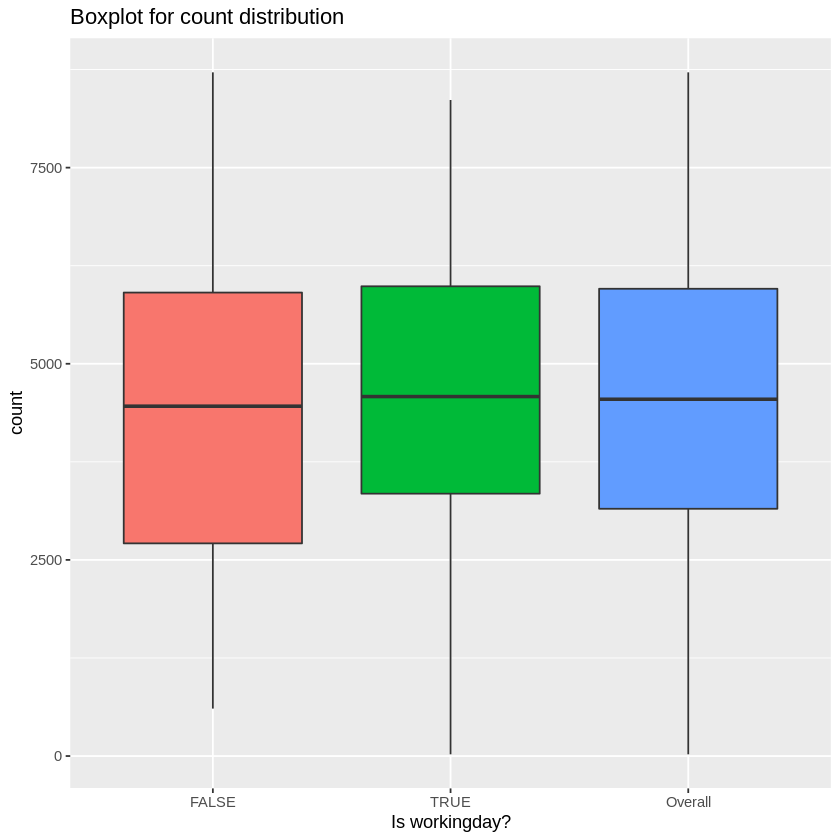

In [9]:
# Section 1
# Part 2 - continue
# visualization - Boxplot

ggplot(
    rbind(BikeSharingData, BikeSharingData %>% mutate(isworkingday="Overall")), 
    aes(x=isworkingday, y=cnt, fill=isworkingday)) +
    geom_boxplot() +
    theme(legend.position="none",) +
    labs(x="Is workingday?", 
         y="count",
         fill = "") +
    ggtitle("Boxplot for count distribution")
    

In [10]:
# Section 2
# Get confidence interval for mean (all) from bootstrapping

In [11]:
sample_mean <- mean(all_BikeSharingData$cnt)

bootstrap_dist <- all_BikeSharingData %>% 
    specify(response = cnt) %>%
    generate(type = "bootstrap", reps = 1000) %>% 
    calculate(stat = "mean")


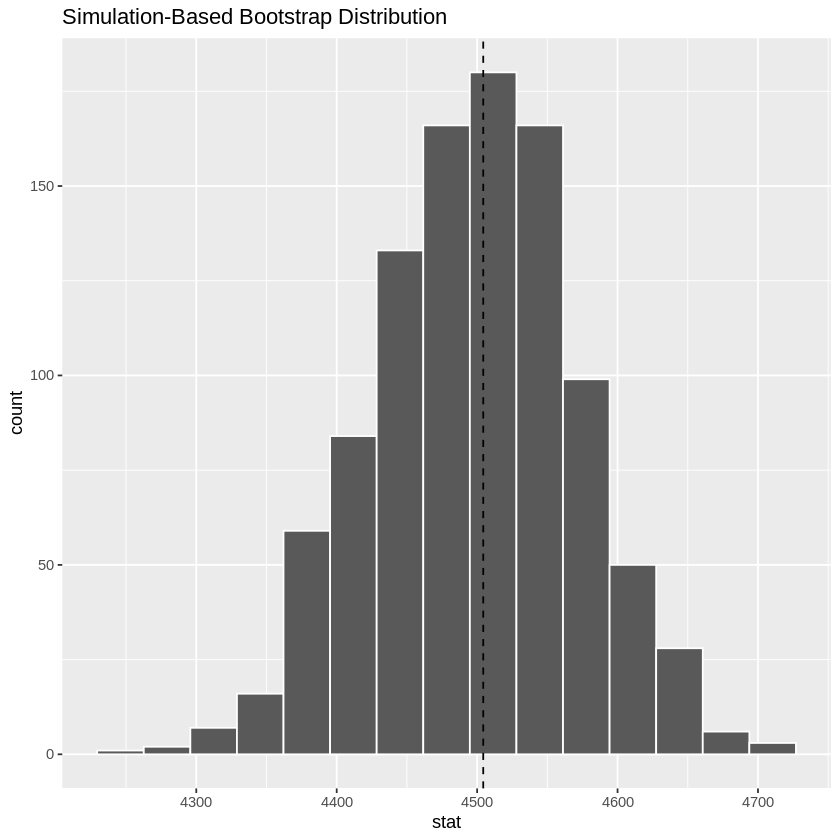

In [12]:
visualize(bootstrap_dist) + geom_vline(xintercept = sample_mean, linetype = "dashed")

In [13]:
ci_percentile <- bootstrap_dist %>% 
    get_confidence_interval(level = confidence_level, type = "percentile")
ci_percentile

lower_ci,upper_ci
<dbl>,<dbl>
4360.592,4636.561


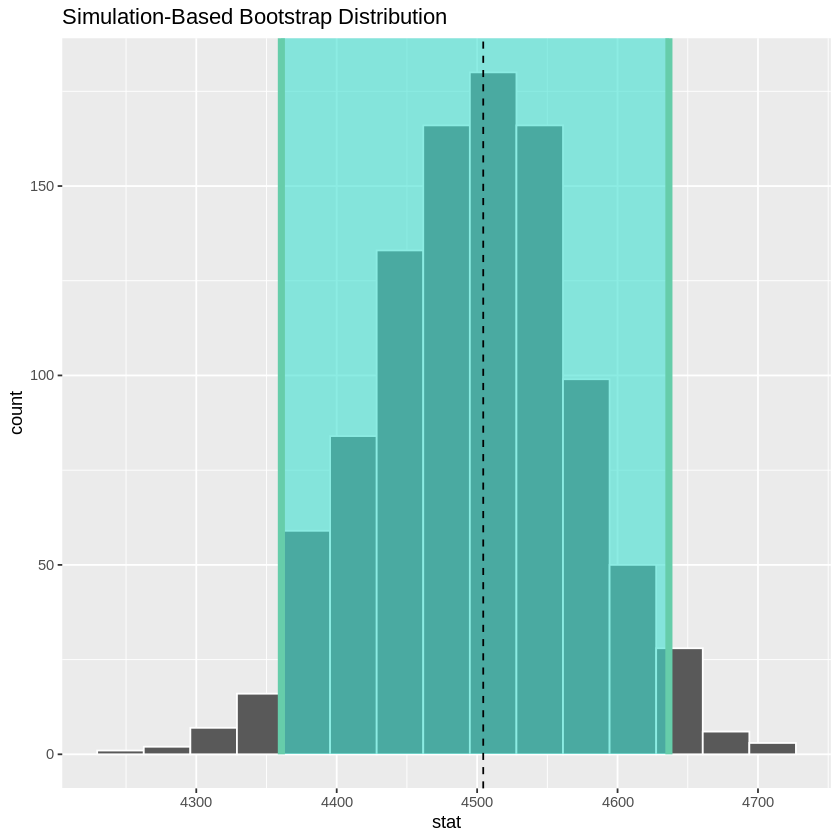

In [14]:
ci_plot_percentile <-  visualize(bootstrap_dist) + 
  shade_confidence_interval(endpoints = ci_percentile) +
    geom_vline(xintercept = sample_mean, linetype = "dashed")

ci_plot_percentile

In [15]:
ci_se <- bootstrap_dist %>% 
    get_confidence_interval(point_estimate = sample_mean, level = confidence_level, type = "se")
ci_se

lower_ci,upper_ci
<dbl>,<dbl>
4364.548,4644.149


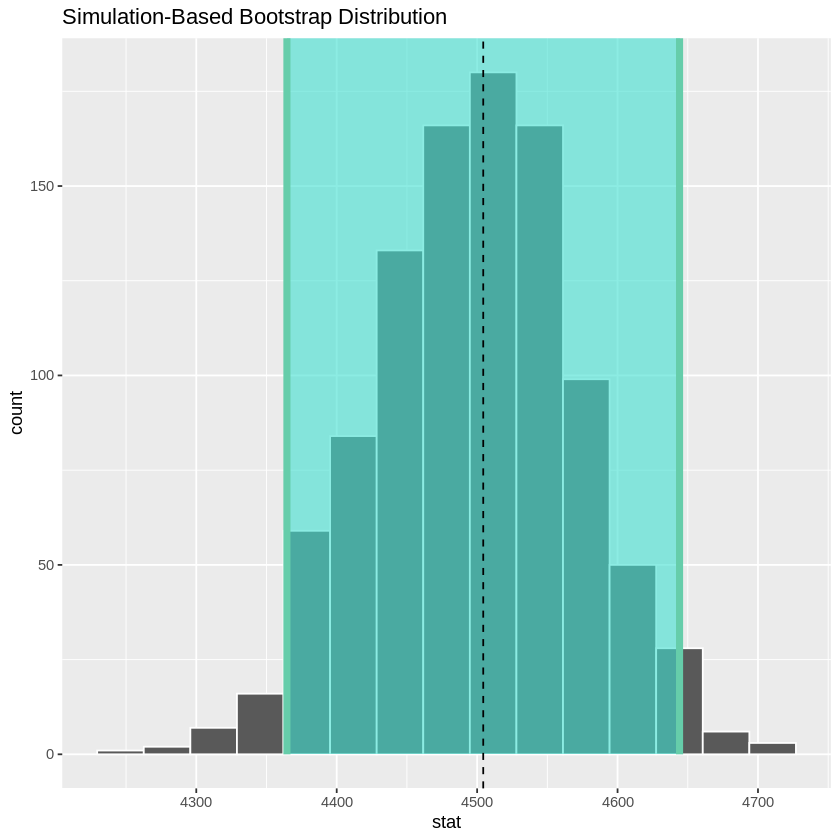

In [16]:
ci_plot_se <-  visualize(bootstrap_dist) + 
  shade_confidence_interval(endpoints = ci_se) +
    geom_vline(xintercept = sample_mean, linetype = "dashed")

ci_plot_se

In [17]:
# Section 3
# Get confidence interval from CLT

In [18]:
sample_sd <- sd(all_BikeSharingData$cnt)

lower <- sample_mean + qnorm((1-confidence_level)/2, 0, 1) * (sample_sd / sqrt(nrow(all_BikeSharingData)))
lower
upper <- sample_mean + qnorm((1-(1-confidence_level)/2), 0, 1) * (sample_sd / sqrt(nrow(all_BikeSharingData)))
upper


[1] 4363.917

[1] 4644.781

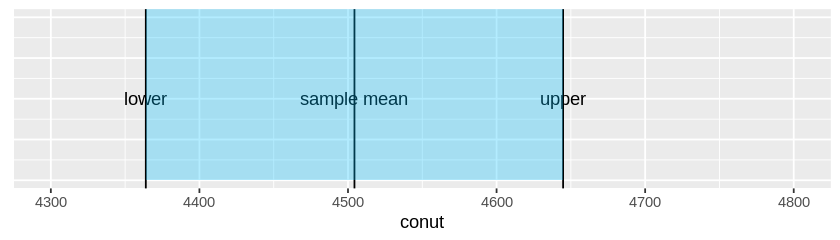

In [19]:
options(repr.plot.width = default_plot_width, repr.plot.height = 2)
ci_plot_CLT <- ggplot() +
  geom_vline(xintercept = sample_mean) +
  geom_vline(xintercept = lower) +
  geom_vline(xintercept = upper) +
  xlim(4300, 4800) +
  ylim(0, 1) +
  labs(x="conut") +
  annotate("text", x=sample_mean, y=0.5, label="sample mean") +
  annotate("text", x=lower, y=0.5, label="lower") +
  annotate("text", x=upper, y=0.5, label="upper") +
  theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) +
    annotate("rect", xmin = lower, xmax = upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3)

ci_plot_CLT

options(repr.plot.width = default_plot_width, repr.plot.height = default_plot_height)

In [20]:
# Section 4
# Hypothesis test
# assume independent, the mean of the count of total rental bikes per day is NOT dependent on workingday or not.
# H_0, mean(is NOT workingday) -  mean(is workingday) = 0
# H_A, mean(is NOT workingday) -  mean(is workingday) != 0
# α = 5%

In [21]:
obs_diff_means <- BikeSharingData %>% 
  specify(formula = cnt ~ isworkingday) %>% 
  calculate(stat = "diff in means", order = c("FALSE", "TRUE"))

null_infer <- BikeSharingData %>% 
  specify(formula = cnt ~ isworkingday) %>% 
  hypothesize(null = "independence") %>% 
  generate(reps = 1000, type = "permute") %>% 
  calculate(stat = "diff in means", order = c("FALSE", "TRUE"))

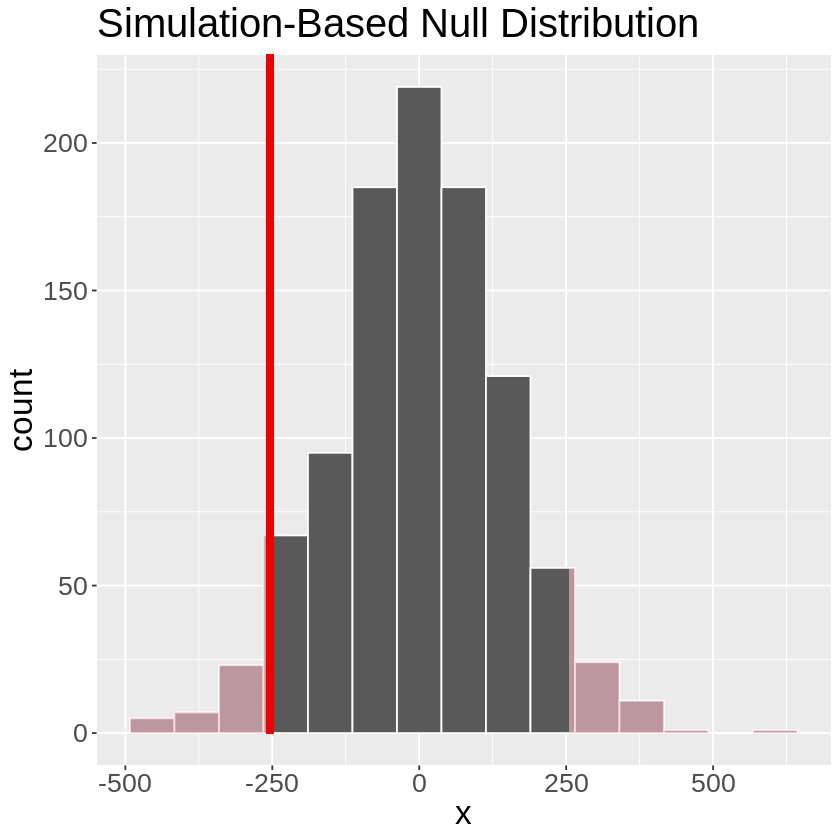

In [22]:
null_plot_infer <- null_infer %>% 
  visualize() + 
  shade_p_value(obs_stat = obs_diff_means, direction = "both") +
  xlab("x") + 
  theme(text = element_text(size=20))
null_plot_infer

In [23]:
get_p_value(null_infer, obs_stat = obs_diff_means, direction = "both")


p_value
<dbl>
0.08
